In [ ]:
!unzip CorrosionTypes.zip


Archive:  CorrosionTypes.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of CorrosionTypes.zip or
        CorrosionTypes.zip.zip, and cannot find CorrosionTypes.zip.ZIP, period.


In [ ]:
import keras
import tensorflow as tf
from keras.applications import VGG16
from keras.utils.vis_utils import plot_model
import os, shutil
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import models
from keras.preprocessing import image
import numpy as np
import sklearn.metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import seaborn
print(keras.__version__)
print(tf.__version__)

2.12.0
2.12.0


In [ ]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

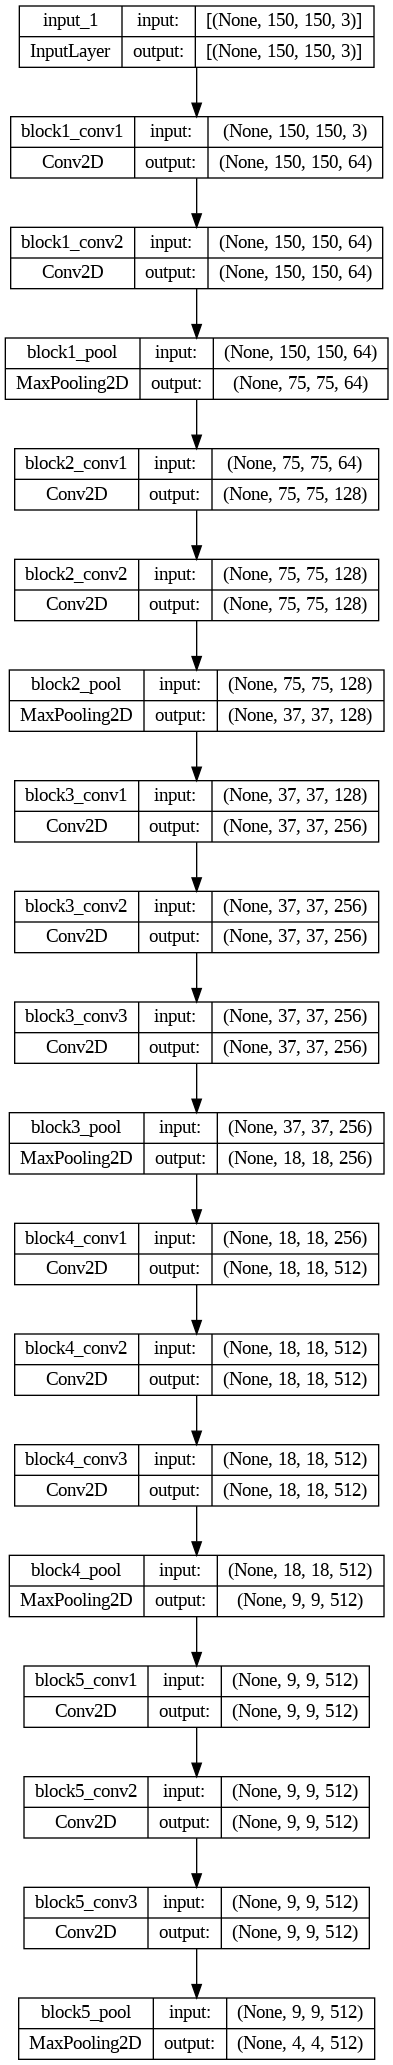

In [ ]:
plot_model(conv_base, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# !unzip download

Archive:  download.zip
  inflating: download/.floyddata     
   creating: download/norust/
  inflating: download/norust/norust.0.jpg  
  inflating: download/norust/norust.1.jpg  
  inflating: download/norust/norust.10.jpg  
  inflating: download/norust/norust.11.jpg  
  inflating: download/norust/norust.12.jpg  
  inflating: download/norust/norust.13.jpg  
  inflating: download/norust/norust.14.jpg  
  inflating: download/norust/norust.15.jpg  
  inflating: download/norust/norust.16.jpg  
  inflating: download/norust/norust.17.jpg  
  inflating: download/norust/norust.18.jpg  
  inflating: download/norust/norust.19.jpg  
  inflating: download/norust/norust.2.jpg  
  inflating: download/norust/norust.20.jpg  
  inflating: download/norust/norust.21.jpg  
  inflating: download/norust/norust.22.jpg  
  inflating: download/norust/norust.23.jpg  
  inflating: download/norust/norust.24.jpg  
  inflating: download/norust/norust.25.jpg  
  inflating: download/norust/norust.26.jpg  
  inflating:

In [ ]:
# The path to the directory where the training images are downloaded, change this as in your system
original_dataset_dir = 'Corrosion'
original_dataset_dir_asp = 'Corrosion/'
original_dataset_dir_eros = 'Corrosion/'
original_dataset_dir_fati = 'Corrosion/'
original_dataset_dir_pitt = 'Corrosion/'
original_dataset_dir_stre = 'Corrosion/'

# The directory where we will store our train, test and validation images
base_dir = 'corrosion_detection'


# Directories for our training,validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training rust pictures
train_rust_dir = os.path.join(train_dir, 'rust')

# Directory with our training norust pictures
train_norust_dir = os.path.join(train_dir, 'norust')

# Directory with our validation rust pictures
validation_rust_dir = os.path.join(validation_dir, 'rust')

# Directory with our validation norust pictures
validation_norust_dir = os.path.join(validation_dir, 'norust')

# Directory with our test rust pictures
test_rust_dir = os.path.join(test_dir, 'rust')

# Directory with our test norust pictures
test_norust_dir = os.path.join(test_dir, 'norust')

In [ ]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_rust_dir)
os.mkdir(train_norust_dir)
os.mkdir(validation_rust_dir)
os.mkdir(validation_norust_dir)
os.mkdir(test_rust_dir)
os.mkdir(test_norust_dir)

In [ ]:
# Copy first 70 rust images to train_rust_dir
fnames = ['rust.{}.jpg'.format(i) for i in range(70)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_rust, fname)
    dst = os.path.join(train_rust_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 5 rust images to validation_rust_dir
fnames = ['rust.{}.jpg'.format(i) for i in range(70, 76)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_rust, fname)
    dst = os.path.join(validation_rust_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 6 rust images to test_rust_dir
fnames = ['rust.{}.jpg'.format(i) for i in range(76, 82)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_rust, fname)
    dst = os.path.join(test_rust_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 60 non-rust images to train_norust_dir
fnames = ['norust.{}.jpg'.format(i) for i in range(60)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_norust, fname)
    dst = os.path.join(train_norust_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 5 norust images to validation_norust_dir
fnames = ['norust.{}.jpg'.format(i) for i in range(60, 66)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_norust, fname)
    dst = os.path.join(validation_norust_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 5 norust images to test_norust_dir
fnames = ['norust.{}.jpg'.format(i) for i in range(63, 72)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_norust, fname)
    dst = os.path.join(test_norust_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training rust images:', len(os.listdir(train_rust_dir)))
print('total training norust images:', len(os.listdir(train_norust_dir)))
print('total validation rust images:', len(os.listdir(validation_rust_dir)))
print('total validation norust images:', len(os.listdir(validation_norust_dir)))
print('total test rust images:', len(os.listdir(test_rust_dir)))
print('total test norust images:', len(os.listdir(test_norust_dir)))

total training rust images: 70
total training norust images: 60
total validation rust images: 6
total validation norust images: 6
total test rust images: 6
total test norust images: 9


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
base_dir = 'rustnorust_b'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

 #       save_to_dir='/home/anirban/rustnorust_b/images')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 130 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [ ]:
from time import time
from keras.callbacks import TensorBoard
#callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.00001,patience=5,mode='min')]
tensorboard = keras.callbacks.TensorBoard(log_dir='/output/{}'.format(time()))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=15,validation_data=validation_generator,validation_steps=20,verbose=2,callbacks=[tensorboard])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-21-ccd1c6f7479f>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=10,epochs=15,validation_data=validation_generator,validation_steps=20,verbose=2,callbacks=[tensorboard])


Epoch 1/15


10/10 - 16s - loss: 0.7753 - acc: 0.3947 - val_loss: 0.5886 - val_acc: 0.7500 - 16s/epoch - 2s/step
Epoch 2/15
10/10 - 9s - loss: 0.6234 - acc: 0.6316 - 9s/epoch - 950ms/step
Epoch 3/15
10/10 - 9s - loss: 0.5328 - acc: 0.8158 - 9s/epoch - 941ms/step
Epoch 4/15
10/10 - 9s - loss: 0.4716 - acc: 0.8250 - 9s/epoch - 853ms/step
Epoch 5/15
10/10 - 10s - loss: 0.5423 - acc: 0.7750 - 10s/epoch - 996ms/step
Epoch 6/15
10/10 - 9s - loss: 0.4610 - acc: 0.8684 - 9s/epoch - 948ms/step
Epoch 7/15
10/10 - 10s - loss: 0.3453 - acc: 0.8750 - 10s/epoch - 987ms/step
Epoch 8/15
10/10 - 9s - loss: 0.4299 - acc: 0.8250 - 9s/epoch - 859ms/step
Epoch 9/15
10/10 - 9s - loss: 0.3142 - acc: 0.9000 - 9s/epoch - 887ms/step
Epoch 10/15
10/10 - 10s - loss: 0.2312 - acc: 0.9500 - 10s/epoch - 987ms/step
Epoch 11/15
10/10 - 10s - loss: 0.3254 - acc: 0.8750 - 10s/epoch - 985ms/step
Epoch 12/15
10/10 - 9s - loss: 0.2969 - acc: 0.8684 - 9s/epoch - 946ms/step
Epoch 13/15
10/10 - 9s - loss: 0.4055 - acc: 0.8250 - 9s/epoch -

In [ ]:
model.save('rustnorust_b/rustnorust_model.h5')

ValueError: ignored

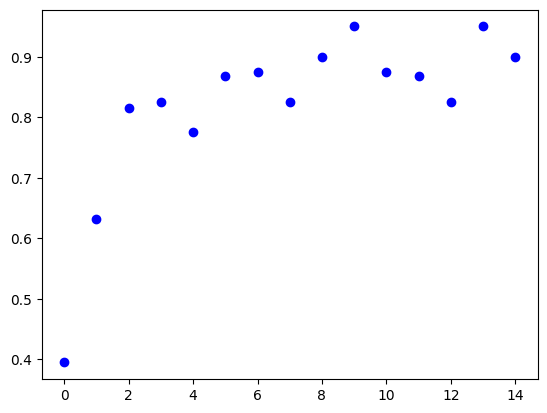

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

1/1 [==============================] - 0s 417ms/step
This is a Rust image


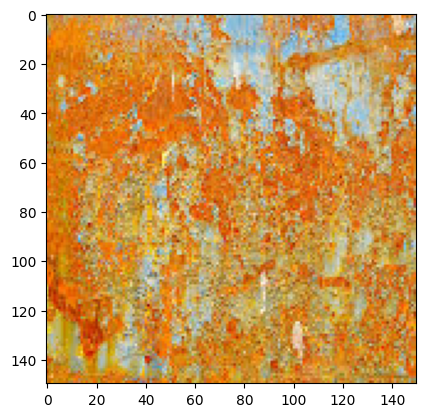

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img,img_to_array
model = models.load_model('rustnorust_b/rustnorust_model.h5')
img_path = 'rustnorust_b/test/rust/rust.81.jpg'

# Read the image and resize it
img = load_img(img_path, target_size=(150, 150))

plt.imshow(img)
# Convert it to a Numpy array with shape (150, 150, 3)
test_x = img_to_array(img)
# Reshape it to (1, 150, 150, 3)
test_x = test_x.reshape((1,) + test_x.shape)
test_x = test_x.astype('float32') / 255
rust_prob = model.predict(test_x)

if (rust_prob > 0.5):
    print("This is a Rust image")
else:
    print("This is a no Rust image")

In [ ]:
# !pip install transformers

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.8.attn.masked_bias', 'decoder.transformer.h.6.crossattention.masked_bias', 'decoder.transformer.h.2.crossattention.masked_bias', 'decoder.transformer.h.7.attn.bias', 'decoder.transformer.h.3.crossattention.bias', 'decoder.transformer.h.11.crossattention.masked_bias', 'decoder.transformer.h.11.crossattention.bias', 'decoder.transformer.h.11.attn.bias', 'decoder.transformer.h.7.attn.masked_bias', 'decoder.transformer.h.1.attn.masked_bias', 'decoder.transformer.h.4.attn.masked_bias', 'decoder.transformer.h.6.attn.masked_bias', 'decoder.transformer.h.3.crossattention.masked_bias', 'decoder.transformer.h.5.crossattention.masked_bias', 'decoder.transformer.h.1.attn.bias', 'decoder.transformer.h.4.crossattention.masked_bias', 'decoder.transformer.h.8.crossattention.bias', 'decoder.transformer.h.9.crossattention.masked_bias', 'decoder.t

In [ ]:
# predict_step(['doctor.e16ba4e4.jpg'])

In [ ]:
from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("rust.28.jpg")

# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]


Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.4.attn.masked_bias', 'decoder.transformer.h.2.crossattention.masked_bias', 'decoder.transformer.h.1.attn.masked_bias', 'decoder.transformer.h.6.crossattention.bias', 'decoder.transformer.h.5.crossattention.bias', 'decoder.transformer.h.10.attn.bias', 'decoder.transformer.h.7.attn.masked_bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.6.attn.bias', 'decoder.transformer.h.3.crossattention.bias', 'decoder.transformer.h.6.crossattention.masked_bias', 'decoder.transformer.h.7.crossattention.bias', 'decoder.transformer.h.1.crossattention.bias', 'decoder.transformer.h.9.crossattention.bias', 'decoder.transformer.h.11.crossattention.masked_bias', 'decoder.transformer.h.8.crossattention.bias', 'decoder.transformer.h.4.attn.bias', 'decoder.transformer.h.4.crossattention.bias', 'decoder.transformer.h.7.crossattention.mas

[{'generated_text': 'a row of old fashioned pipes are shown '}]

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import ViTFeatureExtractor, GPT2Tokenizer, GPT2LMHeadModel
from PIL import Image
import os

In [ ]:
class ImageCaptionDataset(Dataset):
    def __init__(self, image_dir, captions_dict, feature_extractor, tokenizer, transform=None):
        super().__init__()
        self.image_dir = image_dir
        self.image_filenames = os.listdir(image_dir)
        self.captions_dict = captions_dict
        self.transform = transform
        self.feature_extractor = feature_extractor
        self.tokenizer = tokenizer
    def __getitem__(self, idx):
        image_filename = self.image_filenames[idx]
        image_path = os.path.join(self.image_dir, image_filename)
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        features = self.feature_extractor(images=image, return_tensors="pt")
        input_ids = self.tokenizer(self.captions_dict[image_filename], return_tensors="pt").input_ids

        return features.pixel_values, input_ids

In [ ]:
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [ ]:
captions_dict = {}  # A dictionary mapping image filenames to captions
# Fill this dictionary with your actual data

dataset = ImageCaptionDataset('/path/to/your/images', captions_dict, feature_extractor, tokenizer, transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

model = GPT2LMHeadModel.from_pretrained('gpt2')

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define the optimizer and the loss function
optimizer = torch.optim.Adam(model.parameters())
loss_function = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    for batch in dataloader:
        images, input_ids = batch
        images = images.to(device)
        input_ids = input_ids.to(device)

        # Feed the image embeddings and the input IDs except the last token into the model
        outputs = model(input_ids[:,:-1], labels=input_ids[:,1:], return_dict=True)

        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive to access data
# from google.colab import drive
# drive.mount('/content/drive')

# Specify the directory where your custom dataset is located
data_directory = '/content/drive/MyDrive/your_dataset_directory'

# Specify the desired image dimensions
image_size = (64, 64)

# Create an ImageDataGenerator for preprocessing and augmentation
data_generator = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    shear_range=0.2,  # Randomly apply shear transformations
    zoom_range=0.2,  # Randomly apply zoom transformations
    horizontal_flip=True  # Randomly flip images horizontally
)

# Load and preprocess the training data
train_data = data_generator.flow_from_directory(
    data_directory + '/train',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

# Load and preprocess the validation data
val_data = data_generator.flow_from_directory(
    data_directory + '/val',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data = data_generator.flow_from_directory(
    data_directory + '/test',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

# Define the number of classes
num_classes = 5

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, epochs=10, validation_data=val_data)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
